# HPC for ML Project 01
# Maximilian Mundt, Felix Jeske, Radmehr Nouri Inanlou

All code for project 3 has been appended at the bottom of this file in new cells.

## Task 1

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def solve_heat_equation_fd(nx=20, nt=100, L=1.0, T=1.0, alpha=1.0):
    dx = L / (nx - 1)
    dt = T / nt
    x = np.linspace(0, L, nx)
    u = np.zeros((nt, nx))
    u[0, :] = np.sin(np.pi * x)  # initial condition

    r = alpha * dt / dx**2
    A = np.eye(nx) * (1 + 2 * r)
    for i in range(1, nx - 1):
        A[i, i - 1] = -r
        A[i, i + 1] = -r

    for n in range(0, nt - 1):
        u[n + 1, :] = np.linalg.solve(A, u[n, :])

    return x, np.linspace(0, T, nt), u

In [3]:
x, t, u = solve_heat_equation_fd()

nx = len(x)
nt = len(t)
nu = u.shape

print(nx, nt, nu)

print(x)
print(t)
print(u)

20 100 (100, 20)
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768

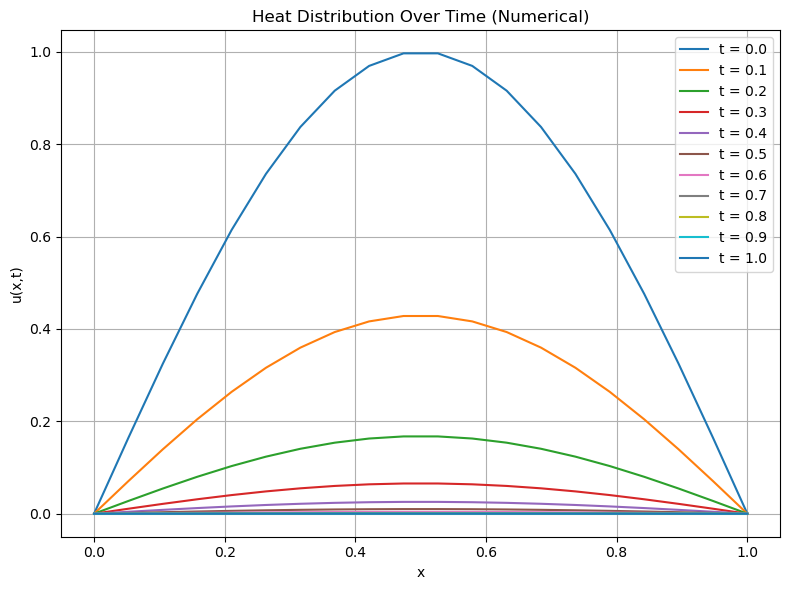

In [4]:
time_indices = np.linspace(0, nt - 1, 11, dtype=int)

plt.figure(figsize=(8, 6))
for i in time_indices:
    plt.plot(x, u[i, :], label=f"t = {t[i]:.1f}")

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Heat Distribution Over Time (Numerical)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("heat_distribution_numerical.png")
plt.show()

## Task 2 

In [5]:
X, T = np.meshgrid(x, t)
XT = np.vstack([X.flatten(), T.flatten()]).T
U = u.flatten()[:, None]

print(XT.shape)

(2000, 2)


In [6]:
def create_data_model():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=(2,)),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1),
        ]
    )
    model.compile(optimizer="adam", loss="mse")

    return model

In [7]:
model = create_data_model()

history = model.fit(XT, U, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0230 - val_loss: 0.0039
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0122 - val_loss: 0.0022
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0087 - val_loss: 0.0019
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0080 - val_loss: 0.0027
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0050 - val_loss: 0.0013
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0032 - val_loss: 0.0017
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0017 - val_loss: 4.8573e-04
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0012 - val_loss: 1.8193e-04
Epoch 11/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 9.2288e-04 - val_loss: 3.9044e-04
Epoch 12/200
50/50 ━━━━━━━━

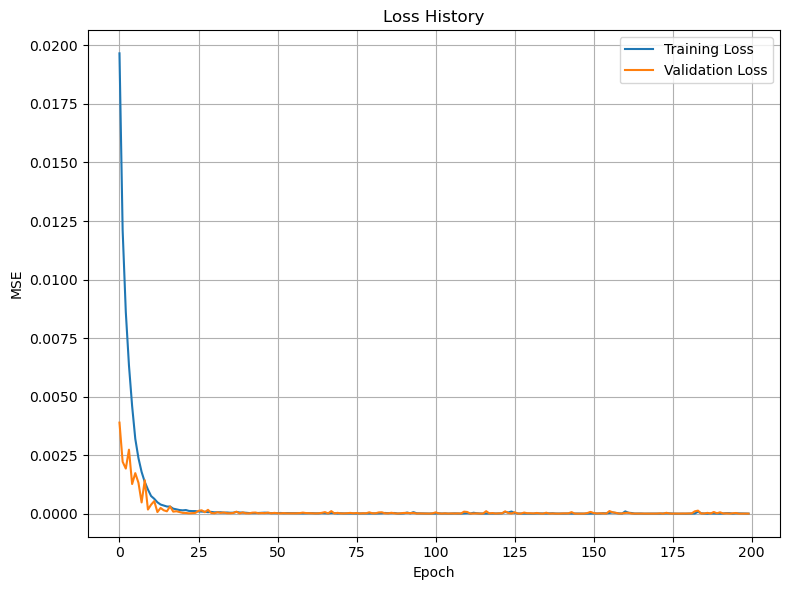

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Loss History")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("loss_history.png")
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


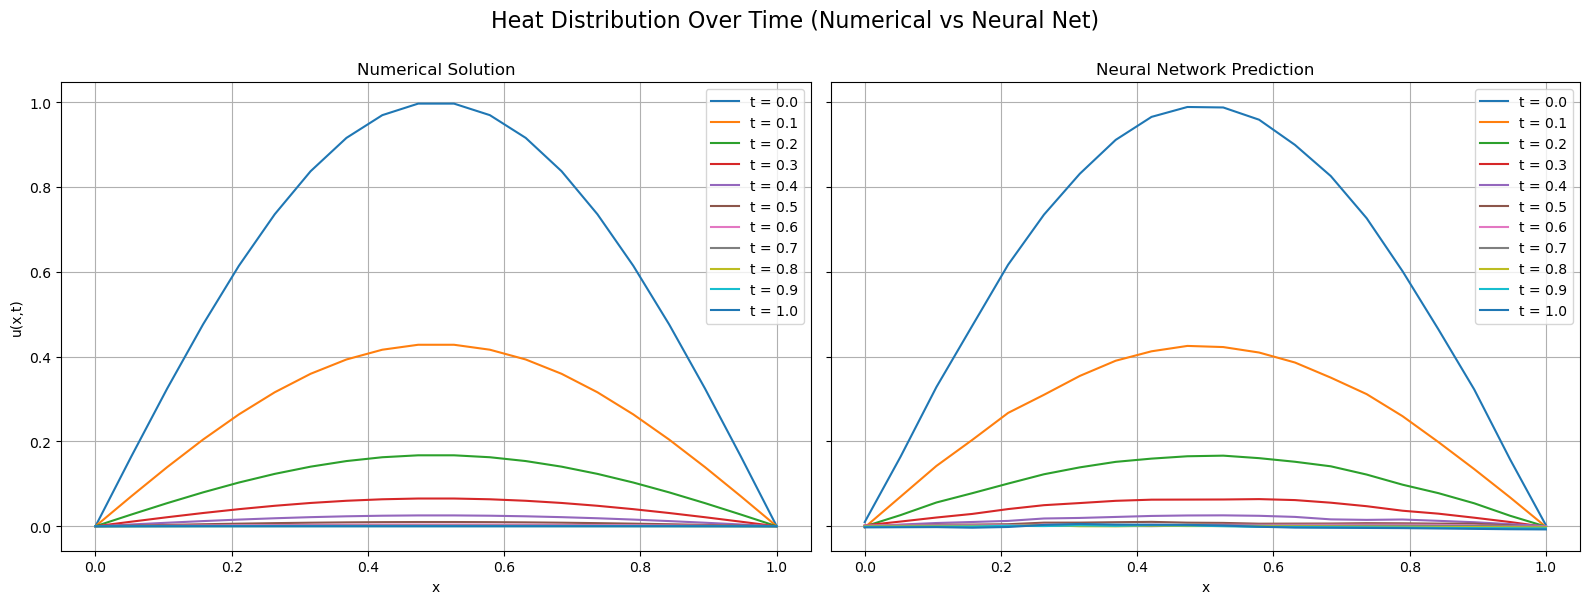

In [9]:
u_true = U.reshape((nt, nx))
u_pred = model.predict(XT).reshape((nt, nx))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i in time_indices:
    axs[0].plot(x, u_true[i, :], label=f"t = {t[i]:.1f}")

axs[0].set_title("Numerical Solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("u(x,t)")
axs[0].legend()
axs[0].grid(True)

for i in time_indices:
    axs[1].plot(x, u_pred[i, :], label=f"t = {t[i]:.1f}")

axs[1].set_title("Neural Network Prediction")
axs[1].set_xlabel("x")
axs[1].legend()
axs[1].grid(True)

plt.suptitle(
    "Heat Distribution Over Time (Numerical vs Neural Net)", fontsize=16, y=1
)
plt.tight_layout()
plt.savefig("heat_distribution_comparison.png")
plt.show()

## Task 3

Epoch 0/500, Total Loss: 0.4079526364803314, Physics Loss: 0.010715916752815247, Data Loss: 0.022312838584184647
Epoch 100/500, Total Loss: 0.16890229284763336, Physics Loss: 0.005709600169211626, Data Loss: 0.022714603692293167
Epoch 200/500, Total Loss: 0.06835175305604935, Physics Loss: 0.01015186496078968, Data Loss: 0.005005382467061281
Epoch 300/500, Total Loss: 0.024146365001797676, Physics Loss: 0.005874366499483585, Data Loss: 0.001381258829496801
Epoch 400/500, Total Loss: 0.011084097437560558, Physics Loss: 0.004258680623024702, Data Loss: 0.0006306053255684674
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
[[ 4.07764837e-02  2.07349375e-01  3.65116805e-01 ...  3.66154850e-01
   2.44215831e-01  1.20224155e-01]
 [ 2.65593436e-02  1.77843586e-01  3.21403176e-01 ...  3.47348630e-01
   2.33626619e-01  1.17103137e-01]
 [ 1.51217040e-02  1.52412325e-01  2.83088148e-01 ...  3.28285486e-01
   2.22787052e-01  1.13875844e-01]
 ...
 [-3.58351972e-04  3.96958087e-04  1.08086178e-03 ...  2.295

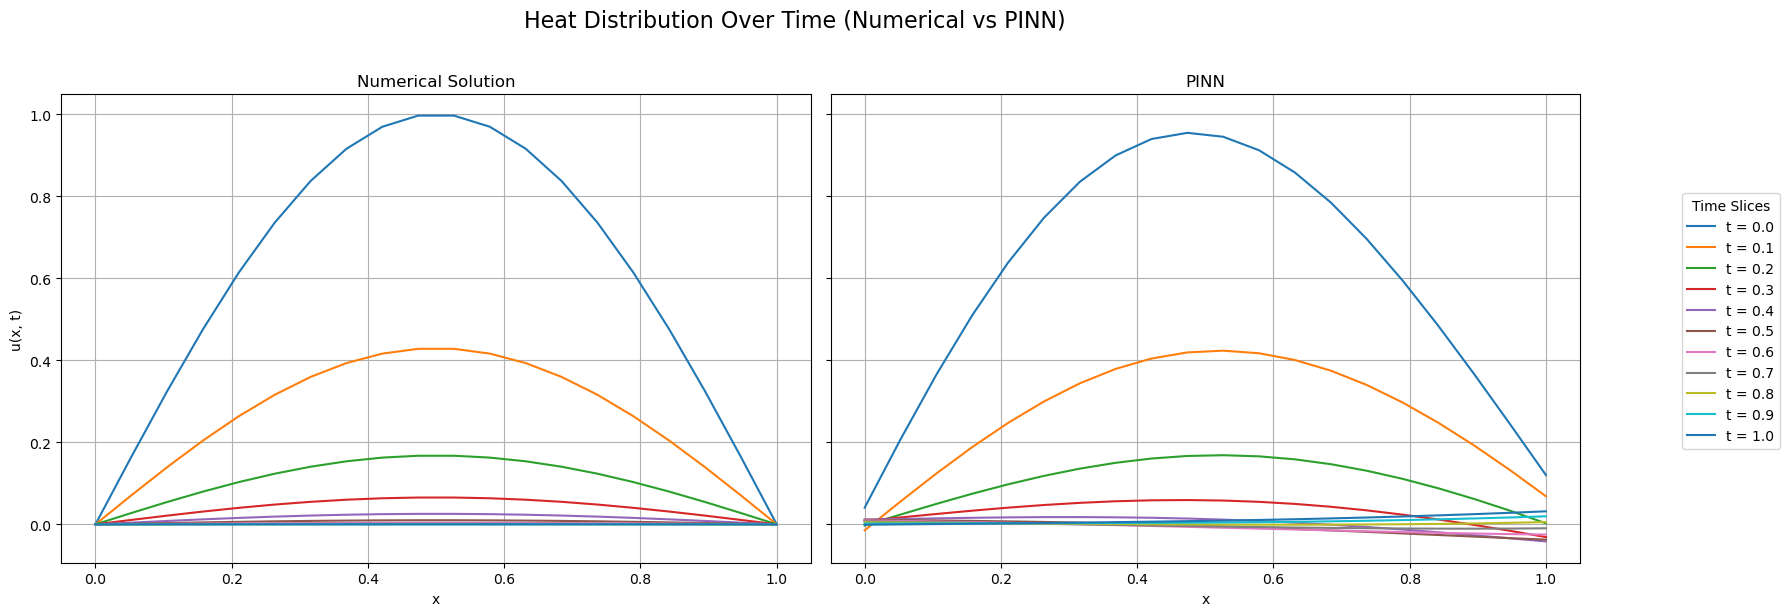

In [ ]:
def create_pinn_model():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=(2,)),
            tf.keras.layers.Dense(100, activation="tanh"),
            tf.keras.layers.Dense(100, activation="tanh"),
            tf.keras.layers.Dense(100, activation="tanh"),
            tf.keras.layers.Dense(1),
        ]
    )

    return model


# Physics-Informed loss: PDE residual
def pinn_loss(model, x_in, t_in, alpha=1.0):
    # Use a persistent tape and watch both x_in and t_in together
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x_in, t_in])  # Watch both x_in and t_in
        # Stack x_in and t_in to form the input tensor for the model
        xt = tf.stack([x_in[:, 0], t_in[:, 0]], axis=1)
        # Get the predicted values from the model
        u = model(xt)

        # Compute the gradients
        u_x = tape2.gradient(u, x_in)  # First spatial derivative
        u_t = tape2.gradient(u, t_in)  # Time derivative
        u_xx = tape2.gradient(u_x, x_in)  # Second spatial derivative

    del tape2  # Clean up tape

    # Compute the PDE residual and return its squared mean
    f = u_t - alpha * u_xx
    return tf.reduce_mean(tf.square(f))


model = create_pinn_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

x_train_tf = tf.constant(XT[:, 0:1], dtype=tf.float32)
t_train_tf = tf.constant(XT[:, 1:2], dtype=tf.float32)
u_train_tf = tf.constant(U, dtype=tf.float32)
input_train = tf.concat([x_train_tf, t_train_tf], axis=1)

# Training loop
num_epochs = 500

# Optional: tune loss weights
λ_data = 1.0
λ_phys = 1.0
λ_init = 1.0
λ_bc = 1.0  # applies to both boundaries combined

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        # === Physics loss ===
        physics_loss_value = pinn_loss(model, x_train_tf, t_train_tf)

        # === Data loss (interior points from FD) ===
        pred_u_data = model(input_train)
        data_loss_value = tf.reduce_mean(tf.square(pred_u_data - u_train_tf))

        # === Initial condition loss: u(x, 0) = sin(pi x) ===
        x0 = tf.constant(x.reshape(-1, 1), dtype=tf.float32)
        t0 = tf.zeros_like(x0)
        u0 = tf.constant(np.sin(np.pi * x).reshape(-1, 1), dtype=tf.float32)
        init_input = tf.concat([x0, t0], axis=1)
        init_loss = tf.reduce_mean(tf.square(model(init_input) - u0))

        # === Boundary condition losses: u(0, t) = u(1, t) = 0 ===
        t_b = tf.constant(t.reshape(-1, 1), dtype=tf.float32)
        x_b0 = tf.zeros_like(t_b)
        x_b1 = tf.ones_like(t_b)
        u_b = tf.zeros_like(t_b)

        bc0_input = tf.concat([x_b0, t_b], axis=1)
        bc1_input = tf.concat([x_b1, t_b], axis=1)
        bc0_loss = tf.reduce_mean(tf.square(model(bc0_input) - u_b))
        bc1_loss = tf.reduce_mean(tf.square(model(bc1_input) - u_b))
        bc_loss = 0.5 * (bc0_loss + bc1_loss)

        # === Total weighted loss ===
        total_loss = (
            λ_phys * physics_loss_value
            + λ_data * data_loss_value
            + λ_init * init_loss
            + λ_bc * bc_loss
        )

    # Apply gradients
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(
            f"Epoch {epoch}/{num_epochs}, Total Loss: {total_loss.numpy()}, Physics Loss: {physics_loss_value.numpy()}, Data Loss: {data_loss_value.numpy()}"
        )

# Generate test data for prediction
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
t_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Convert to TensorFlow tensors
x_test_tf = tf.convert_to_tensor(x_test, dtype=tf.float32)
t_test_tf = tf.convert_to_tensor(t_test, dtype=tf.float32)

input_test = tf.concat([x_test_tf, t_test_tf], axis=1)

u_exact_test = np.sin(np.pi * x_test) * np.exp(-np.pi**2 * t_test)
u_exact_test_tf = tf.convert_to_tensor(u_exact_test, dtype=tf.float32)

X_test, T_test = np.meshgrid(x, t)
XT_test = np.vstack([X_test.flatten(), T_test.flatten()]).T

input_test = tf.constant(XT_test, dtype=tf.float32)
u_pred = model.predict(XT).reshape((nt, nx))

print(u_pred)

# Plot comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Numerical solution
for i in time_indices:
    axs[0].plot(x, u_true[i, :], label=f"t = {t[i]:.1f}")

axs[0].set_title("Numerical Solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("u(x, t)")
axs[0].grid(True)

# PINN prediction
for i in time_indices:
    axs[1].plot(x, u_pred[i, :], label=f"t = {t[i]:.1f}")

axs[1].set_title("PINN")
axs[1].set_xlabel("x")
axs[1].grid(True)

# Common legend and title
lines, labels = axs[1].get_legend_handles_labels()
fig.legend(
    lines,
    labels,
    loc="center right",
    bbox_to_anchor=(1.12, 0.5),
    title="Time Slices",
)
plt.suptitle(
    "Heat Distribution Over Time (Numerical vs PINN)", fontsize=16, y=1.02
)
plt.tight_layout()
plt.savefig("heat_distribution_comparison_pinn.png", bbox_inches="tight")
plt.show()

# Project 3 Code

In [ ]:
# === Model definitions ===

def create_pinn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(100, activation="tanh"),
        tf.keras.layers.Dense(100, activation="tanh"),
        tf.keras.layers.Dense(100, activation="tanh"),
        tf.keras.layers.Dense(1),
    ])
    return model

def create_gate_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(2),
        tf.keras.layers.Softmax(axis=-1)
    ])
    return model

# === Loss-Functions ===

def pinn_loss(model, x_in, t_in, alpha=1.0):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x_in, t_in])
        xt = tf.stack([x_in[:, 0], t_in[:, 0]], axis=1)
        u = model(xt)
        u_x = tape2.gradient(u, x_in)
        u_t = tape2.gradient(u, t_in)
        u_xx = tape2.gradient(u_x, x_in)
    del tape2
    f = u_t - alpha * u_xx
    return tf.reduce_mean(tf.square(f))

def gated_output(gate_model, expert1, expert2, xt):
    weights = gate_model(xt)
    u1 = expert1(xt)
    u2 = expert2(xt)
    return weights[:, 0:1] * u1 + weights[:, 1:2] * u2

def gated_pinn_loss(gate_model, expert1, expert2, x_in, t_in, alpha=1.0):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x_in, t_in])
        xt = tf.concat([x_in, t_in], axis=1)
        u = gated_output(gate_model, expert1, expert2, xt)
        u_x = tape2.gradient(u, x_in)
        u_t = tape2.gradient(u, t_in)
        u_xx = tape2.gradient(u_x, x_in)
    del tape2
    f = u_t - alpha * u_xx
    return tf.reduce_mean(tf.square(f))

# === Training Data ===

xt = np.random.rand(10000, 2)
xt1 = xt[(xt[:, 0] >= 0.0) & (xt[:, 0] <= 0.6)]
xt2 = xt[(xt[:, 0] >= 0.4) & (xt[:, 0] <= 1.0)]

xt1_tf = tf.convert_to_tensor(xt1, dtype=tf.float32)
xt2_tf = tf.convert_to_tensor(xt2, dtype=tf.float32)

x1_tf = tf.reshape(xt1_tf[:, 0], (-1, 1))
t1_tf = tf.reshape(xt1_tf[:, 1], (-1, 1))
x2_tf = tf.reshape(xt2_tf[:, 0], (-1, 1))
t2_tf = tf.reshape(xt2_tf[:, 1], (-1, 1))

# === Models & Optimizer ===

expert1 = create_pinn_model()
expert2 = create_pinn_model()
gate_model = create_gate_model()

optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.001)
gate_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# === TRAINING ===

# Learning Rates & Epochs
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.002)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.002)
epochs = 1000

# Initial & Boundary data
nx0 = 100
ntb = 100
x0 = np.linspace(0, 1, nx0).reshape(-1, 1)
t0 = np.zeros_like(x0)
u0 = np.sin(np.pi * x0)

t_b = np.linspace(0, 1, ntb).reshape(-1, 1)
x_b0 = np.zeros_like(t_b)
x_b1 = np.ones_like(t_b)
u_b = np.zeros_like(t_b)

x0_tf = tf.convert_to_tensor(x0, dtype=tf.float32)
t0_tf = tf.convert_to_tensor(t0, dtype=tf.float32)
u0_tf = tf.convert_to_tensor(u0, dtype=tf.float32)

x_b0_tf = tf.convert_to_tensor(x_b0, dtype=tf.float32)
x_b1_tf = tf.convert_to_tensor(x_b1, dtype=tf.float32)
t_b_tf = tf.convert_to_tensor(t_b, dtype=tf.float32)
u_b_tf = tf.convert_to_tensor(u_b, dtype=tf.float32)

# Weights for different loss components
λ_phys = 1.0
λ_init = 10.0
λ_bc = 10.0

for epoch in range(epochs):
    # === Expert 1 ===
    with tf.GradientTape() as tape1:
        loss_phys1 = pinn_loss(expert1, x1_tf, t1_tf)

        # Initial condition u(x, 0) = sin(pi x)
        u0_pred1 = expert1(tf.concat([x0_tf, t0_tf], axis=1))
        loss_init1 = tf.reduce_mean(tf.square(u0_pred1 - u0_tf))

        # Boundary condition u(0, t) = 0, u(1, t) = 0
        ub0_pred1 = expert1(tf.concat([x_b0_tf, t_b_tf], axis=1))
        ub1_pred1 = expert1(tf.concat([x_b1_tf, t_b_tf], axis=1))
        loss_bc1 = tf.reduce_mean(tf.square(ub0_pred1 - u_b_tf)) + tf.reduce_mean(tf.square(ub1_pred1 - u_b_tf))

        loss1 = λ_phys * loss_phys1 + λ_init * loss_init1 + λ_bc * loss_bc1

    grads1 = tape1.gradient(loss1, expert1.trainable_variables)
    optimizer1.apply_gradients(zip(grads1, expert1.trainable_variables))

    # === Expert 2 ===
    with tf.GradientTape() as tape2:
        loss_phys2 = pinn_loss(expert2, x2_tf, t2_tf)

        u0_pred2 = expert2(tf.concat([x0_tf, t0_tf], axis=1))
        loss_init2 = tf.reduce_mean(tf.square(u0_pred2 - u0_tf))

        ub0_pred2 = expert2(tf.concat([x_b0_tf, t_b_tf], axis=1))
        ub1_pred2 = expert2(tf.concat([x_b1_tf, t_b_tf], axis=1))
        loss_bc2 = tf.reduce_mean(tf.square(ub0_pred2 - u_b_tf)) + tf.reduce_mean(tf.square(ub1_pred2 - u_b_tf))

        loss2 = λ_phys * loss_phys2 + λ_init * loss_init2 + λ_bc * loss_bc2

    grads2 = tape2.gradient(loss2, expert2.trainable_variables)
    optimizer2.apply_gradients(zip(grads2, expert2.trainable_variables))

    # Logging
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d}: Expert1 Loss = {loss1.numpy():.4e} | Expert2 Loss = {loss2.numpy():.4e}")

for epoch in range(500):
    with tf.GradientTape() as tape:
        loss = gated_pinn_loss(gate_model, expert1, expert2, x1_tf, t1_tf)
    grads = tape.gradient(loss, gate_model.trainable_variables)
    gate_optimizer.apply_gradients(zip(grads, gate_model.trainable_variables))

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Gated Loss = {loss.numpy():.4e}")


Epoch    0: Expert1 Loss = 7.0518e+00 | Expert2 Loss = 6.4104e+00
Epoch  100: Expert1 Loss = 1.5051e+00 | Expert2 Loss = 1.3404e+00
Epoch  200: Expert1 Loss = 1.5339e-01 | Expert2 Loss = 3.1109e-01
Epoch  300: Expert1 Loss = 2.2746e-02 | Expert2 Loss = 1.4520e-01
Epoch  400: Expert1 Loss = 9.4581e-03 | Expert2 Loss = 9.0169e-02
Epoch  500: Expert1 Loss = 2.3890e-02 | Expert2 Loss = 5.5561e-02
Epoch  600: Expert1 Loss = 4.1519e-03 | Expert2 Loss = 5.3763e-02
Epoch  700: Expert1 Loss = 3.0208e-03 | Expert2 Loss = 1.5601e-02
Epoch  800: Expert1 Loss = 1.2807e-01 | Expert2 Loss = 4.1120e-02
Epoch  900: Expert1 Loss = 1.9582e-03 | Expert2 Loss = 6.2552e-03
Epoch 0: Gated Loss = 1.1068e+00
Epoch 50: Gated Loss = 2.8681e-01
Epoch 100: Gated Loss = 3.5805e-02
Epoch 150: Gated Loss = 1.2020e-02
Epoch 200: Gated Loss = 6.5532e-03
Epoch 250: Gated Loss = 4.3846e-03
Epoch 300: Gated Loss = 3.2956e-03
Epoch 350: Gated Loss = 2.6697e-03
Epoch 400: Gated Loss = 2.2763e-03
Epoch 450: Gated Loss = 2.01

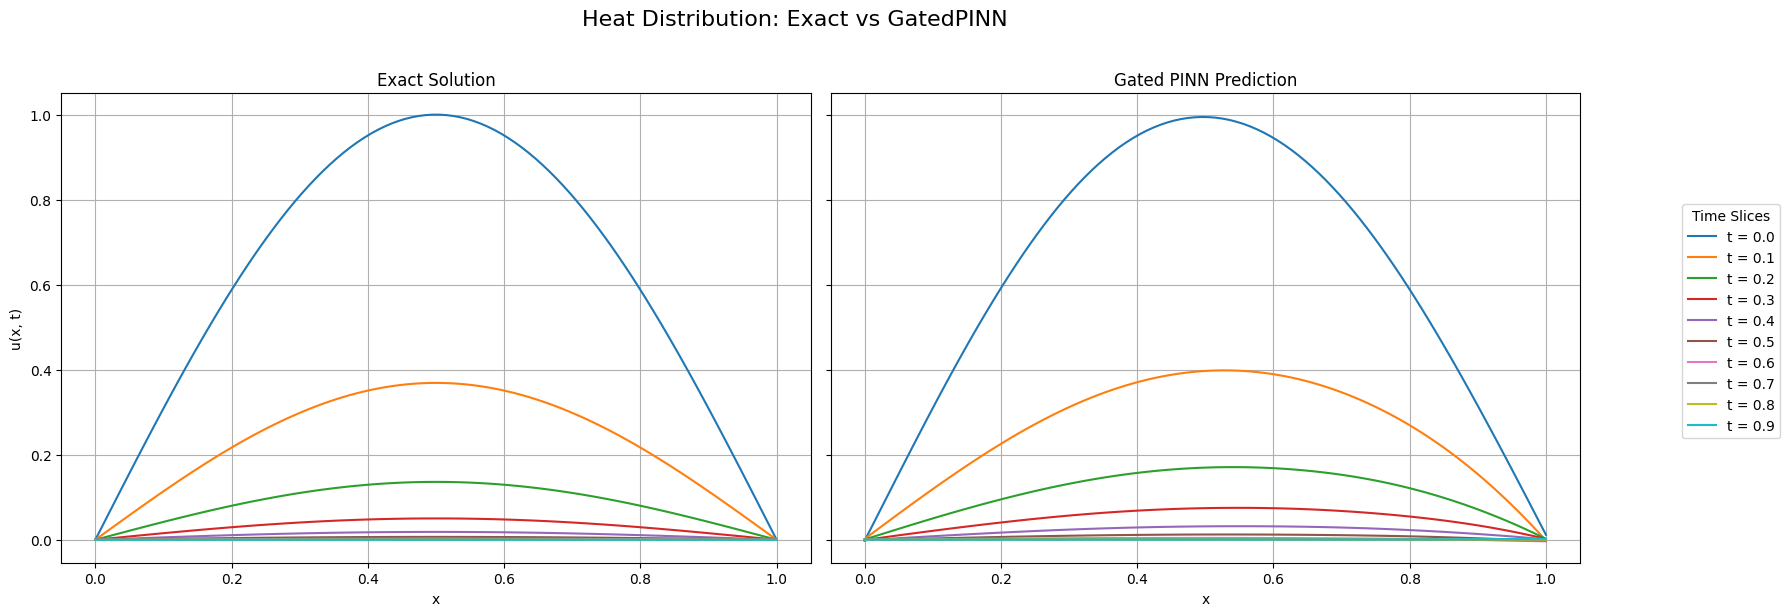

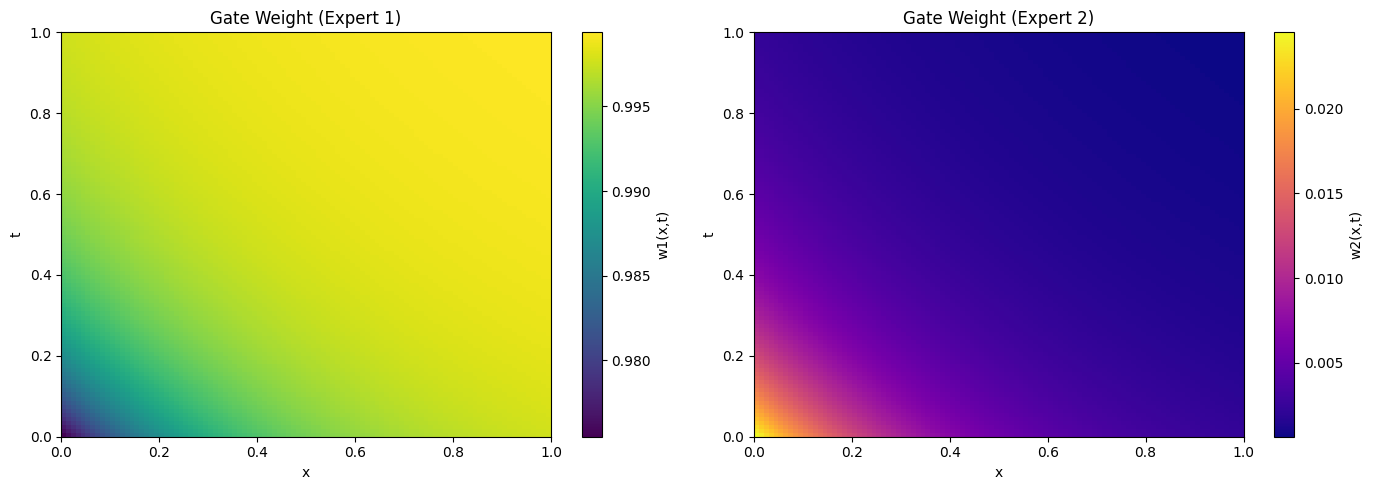

In [ ]:
# === Prediction & Visualization ===

nx = nt = 100
x = np.linspace(0, 1, nx)
t = np.linspace(0, 1, nt)
X, T = np.meshgrid(x, t)
XT_test = np.stack([X.flatten(), T.flatten()], axis=1)

xt_test = tf.convert_to_tensor(XT_test, dtype=tf.float32)
u_pred_combined = gated_output(gate_model, expert1, expert2, xt_test).numpy().reshape((nt, nx))
u_true = np.sin(np.pi * X) * np.exp(-np.pi**2 * T)

time_indices = list(range(0, 100, 10))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i in time_indices:
    axs[0].plot(x, u_true[i, :], label=f"t = {t[i]:.1f}")
axs[0].set_title("Exact Solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("u(x, t)")
axs[0].grid(True)

for i in time_indices:
    axs[1].plot(x, u_pred_combined[i, :], label=f"t = {t[i]:.1f}")
axs[1].set_title("Gated PINN Prediction")
axs[1].set_xlabel("x")
axs[1].grid(True)

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc="center right", bbox_to_anchor=(1.12, 0.5), title="Time Slices")
plt.suptitle("Heat Distribution: Exact vs GatedPINN", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig("heat_distribution_gatedpinn.png", bbox_inches="tight")
plt.show()

# Visualize Gate Weights
gate_weights = gate_model(xt_test).numpy()
gate_w1 = gate_weights[:, 0].reshape((nt, nx))
gate_w2 = gate_weights[:, 1].reshape((nt, nx))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].imshow(gate_w1, extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
axs[0].set_title("Gate Weight (Expert 1)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")
axs[0].grid(False)
fig.colorbar(axs[0].images[0], ax=axs[0], label="w1(x,t)")

axs[1].imshow(gate_w2, extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='plasma')
axs[1].set_title("Gate Weight (Expert 2)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")
axs[1].grid(False)
fig.colorbar(axs[1].images[0], ax=axs[1], label="w2(x,t)")

plt.tight_layout()
plt.show()